In [5]:
from keras.datasets import mnist
import seaborn as sb
from keras.utils import np_utils
from keras.initializers import RandomNormal,he_normal,he_uniform
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

In [117]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [161]:
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [118]:
print("train data set size" , X_train.shape[0], "no of features in train", X_train.shape[1:])
print("train data set size" , X_test.shape[0], "no of features in train", X_test.shape[1:])

train data set size 60000 no of features in train (28, 28)
train data set size 10000 no of features in train (28, 28)


In [119]:
X_train.shape

(60000, 28, 28)

# converting image to 28*28 vector

In [22]:
'''a=np.random.rand(5*3*2)
a=a.reshape(5,3,2)
print(a.shape)
a=a.reshape(a.shape[0],a.shape[1]*a.shape[2])
print(a.shape)
'''

(5, 3, 2)
(5, 6)


In [120]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_train.shape
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
X_test.shape

(10000, 784)

In [121]:
print("train dataset shape",X_train.shape)
print("test dataset shape",X_test.shape)

train dataset shape (60000, 784)
test dataset shape (10000, 784)


In [98]:
from sklearn.preprocessing import normalize
#X_train=normalize(X_train,axis=0)
#X_test=normalize(X_train,axis=0)
#X_train[0]
#X_train.max(axis=0)

In [122]:

X_train=X_train/255
X_test=X_test/255

In [126]:
print(X_train.min(),X_train.max())
print(X_test.max(),X_test.min())

0.0 1.0
1.0 0.0


# Softmax classifier

In [127]:
from keras.layers import Dense,Activation
from keras.models import Sequential

In [128]:
input_dim=X_train.shape[1]
output_dim=10
batch_size=128
nb_epochs=20

In [130]:
model=Sequential()
model.add(Dense(output_dim,input_dim=input_dim,activation='softmax'))

In [131]:
model.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['accuracy'])


In [132]:
Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

In [105]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(60000, 784) (60000, 10) (10000, 784) (10000, 10)


In [133]:
type(Y_train)
Y_train[:3]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [134]:
#history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epochs, verbose=1, validation_data=(X_test, Y_test)) 
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epochs, verbose=1, validation_data=(X_test, Y_test)) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 29us/step - loss: 1.2614 - acc: 0.7104 - val_loss: 0.8060 - val_acc: 0.8350
Epoch 2/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.7133 - acc: 0.8433 - val_loss: 0.6045 - val_acc: 0.8638
Epoch 3/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.5859 - acc: 0.8608 - val_loss: 0.5231 - val_acc: 0.8750
Epoch 4/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.5245 - acc: 0.8702 - val_loss: 0.4777 - val_acc: 0.8829
Epoch 5/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.4872 - acc: 0.8761 - val_loss: 0.4481 - val_acc: 0.8872
Epoch 6/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.4614 - acc: 0.8811 - val_loss: 0.4269 - val_acc: 0.8898
Epoch 7/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.4424 - acc: 0.8837 - val_loss: 0.4108 - val_acc

In [135]:
score=model.evaluate(X_test,Y_test,verbose=0)
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.33458452565073965
Test accuracy: 0.9093


# MLP+sigmoid activation +SGDOptimizer

In [136]:
model_sigmoid=Sequential()
model_sigmoid.add(Dense(512,activation='sigmoid',input_shape=(input_dim,)))
model_sigmoid.add(Dense(128,activation='sigmoid'))
model_sigmoid.add(Dense(output_dim,activation='softmax'))

model_sigmoid.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_12 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [137]:
model_sigmoid.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
history=model_sigmoid.fit(X_train,Y_train,batch_size=batch_size,epochs=nb_epochs,verbose=1,validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 180us/step - loss: 2.2714 - acc: 0.1908 - val_loss: 2.2270 - val_acc: 0.2780
Epoch 2/20
60000/60000 [==============================] - 8s 134us/step - loss: 2.1832 - acc: 0.4591 - val_loss: 2.1310 - val_acc: 0.5197
Epoch 3/20
60000/60000 [==============================] - 10s 169us/step - loss: 2.0718 - acc: 0.5899 - val_loss: 1.9951 - val_acc: 0.7008
Epoch 4/20
60000/60000 [==============================] - 8s 137us/step - loss: 1.9101 - acc: 0.6544 - val_loss: 1.8006 - val_acc: 0.6743
Epoch 5/20
60000/60000 [==============================] - 11s 181us/step - loss: 1.6925 - acc: 0.6880 - val_loss: 1.5580 - val_acc: 0.7190
Epoch 6/20
60000/60000 [==============================] - 11s 181us/step - loss: 1.4505 - acc: 0.7216 - val_loss: 1.3205 - val_acc: 0.7359
Epoch 7/20
60000/60000 [==============================] - 9s 146us/step - loss: 1.2336 - acc: 0.7508 - val_loss: 1.125

In [138]:
score=model_sigmoid.evaluate(X_test,Y_test,verbose=0)
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


Test score: 0.4605082578420639
Test accuracy: 0.8785


In [139]:
w_after=model_sigmoid.get_weights()


In [142]:
print(type(w_after))
print("length of weigths",w_after)
w_after[0]

<class 'list'>
length of weigths [array([[ 0.05462548, -0.04228503,  0.01418341, ..., -0.0663244 ,
        -0.04459018, -0.0393944 ],
       [-0.02329222, -0.05059307, -0.02586667, ...,  0.03078464,
         0.02287617, -0.04051736],
       [-0.04891748,  0.0122173 ,  0.06470804, ..., -0.03550461,
         0.04300069, -0.03748894],
       ...,
       [-0.00616867, -0.0558772 , -0.00013889, ...,  0.0014256 ,
         0.03827918,  0.00596883],
       [ 0.00908642,  0.0466719 , -0.02584259, ..., -0.02970552,
        -0.04200502, -0.01522023],
       [ 0.02764605,  0.02412538,  0.06771864, ..., -0.06641862,
         0.04066073, -0.03630875]], dtype=float32), array([ 2.98067858e-03,  7.29878899e-03,  6.93545537e-03,  9.54390410e-03,
       -3.45547311e-03,  3.91488336e-03,  9.65643767e-03, -6.91016996e-03,
        1.49862468e-02,  2.29078112e-03, -6.91627711e-03,  6.62090816e-03,
       -9.99537297e-03, -1.21085932e-02,  9.86472610e-03, -8.34965333e-03,
        7.14196300e-04, -4.98387555e-

array([[ 0.05462548, -0.04228503,  0.01418341, ..., -0.0663244 ,
        -0.04459018, -0.0393944 ],
       [-0.02329222, -0.05059307, -0.02586667, ...,  0.03078464,
         0.02287617, -0.04051736],
       [-0.04891748,  0.0122173 ,  0.06470804, ..., -0.03550461,
         0.04300069, -0.03748894],
       ...,
       [-0.00616867, -0.0558772 , -0.00013889, ...,  0.0014256 ,
         0.03827918,  0.00596883],
       [ 0.00908642,  0.0466719 , -0.02584259, ..., -0.02970552,
        -0.04200502, -0.01522023],
       [ 0.02764605,  0.02412538,  0.06771864, ..., -0.06641862,
         0.04066073, -0.03630875]], dtype=float32)

In [146]:

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


C:\Users\admin\AppData\Local\Programs\Python\Python36\Lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


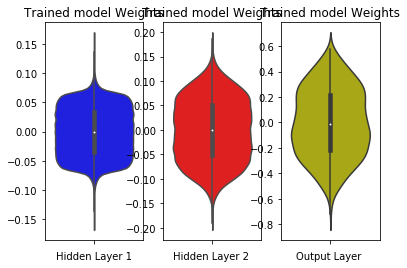

In [147]:
import seaborn as sns
fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# MLP+sigmoid activation_Adam

In [155]:
output_dim = 10
input_dim = X_train.shape[1]
model_sigmoid_adam=Sequential()
model_sigmoid_adam.add(Dense(512,activation='sigmoid',input_dim=input_dim))
model_sigmoid_adam.add(Dense(128,activation='sigmoid'))
model_sigmoid_adam.add(Dense(10,activation='softmax'))
model_sigmoid_adam.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_21 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_22 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [157]:
model_sigmoid_adam.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epochs, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 222us/step - loss: 0.4703 - acc: 0.8754 - val_loss: 0.4468 - val_acc: 0.8821
Epoch 2/20
60000/60000 [==============================] - 12s 200us/step - loss: 0.4578 - acc: 0.8784 - val_loss: 0.4355 - val_acc: 0.8848
Epoch 3/20
60000/60000 [==============================] - 12s 207us/step - loss: 0.4466 - acc: 0.8805 - val_loss: 0.4247 - val_acc: 0.8866
Epoch 4/20
60000/60000 [==============================] - 12s 204us/step - loss: 0.4365 - acc: 0.8830 - val_loss: 0.4146 - val_acc: 0.8882ss: 0.4366 - acc: 0.882
Epoch 5/20
60000/60000 [==============================] - 13s 221us/step - loss: 0.4273 - acc: 0.8845 - val_loss: 0.4067 - val_acc: 0.8899
Epoch 6/20
60000/60000 [==============================] - 12s 196us/step - loss: 0.4190 - acc: 0.8863 - val_loss: 0.3983 - val_acc: 0.8912
Epoch 7/20
60000/60000 [==============================] - 12s 194us/step - loss: 0.4115 - acc

In [158]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


Test score: 0.3366688088297844
Test accuracy: 0.9036


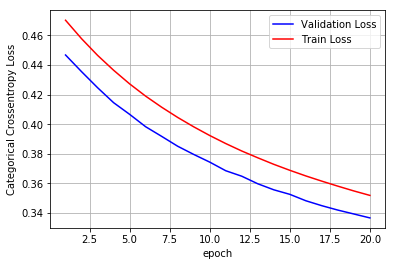

In [162]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

C:\Users\admin\AppData\Local\Programs\Python\Python36\Lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


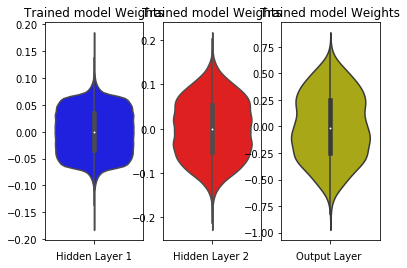

In [164]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# MLP+RElu+Adam

In [165]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_24 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_25 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [167]:
print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epochs, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_24 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_25 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 18s 307us/step - loss: 0.2240 - acc: 0.9337 - val_loss: 0.1156 - val_acc: 0.9632
Epoch 2/20
60000/60000 [==============================] - 17s 281us/step - loss: 0.0868 - acc: 0.9738 - val_loss: 0.0885 - val_acc: 0.9726
Epoch 3/20
60000/60000 [==============================] - 14s 230us

Test score: 0.11066463198367196
Test accuracy: 0.9768


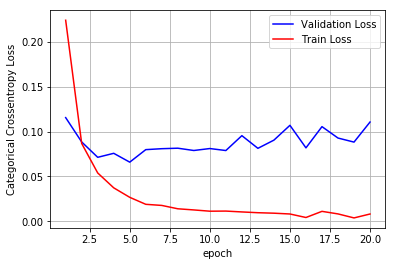

In [168]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

C:\Users\admin\AppData\Local\Programs\Python\Python36\Lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


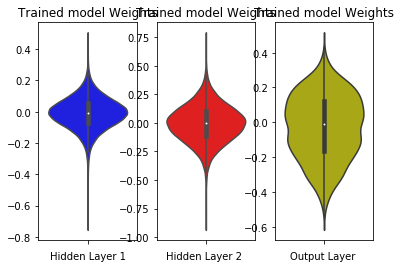

In [170]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# MLP+Relu+Adam+batch normalization

In [172]:
from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))
model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_28 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_29 (Dense)             (None, 10)                1290      
Total params: 471,434
Trainable params: 470,154
Non-trainable params: 1,280
_________________________________________________________________


In [174]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epochs, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 20s 333us/step - loss: 0.1939 - acc: 0.9420 - val_loss: 0.1118 - val_acc: 0.9664
Epoch 2/20
60000/60000 [==============================] - 19s 311us/step - loss: 0.0753 - acc: 0.9775 - val_loss: 0.1025 - val_acc: 0.9671
Epoch 3/20
60000/60000 [==============================] - 16s 267us/step - loss: 0.0479 - acc: 0.9855 - val_loss: 0.0813 - val_acc: 0.9751
Epoch 4/20
60000/60000 [==============================] - 17s 287us/step - loss: 0.0334 - acc: 0.9899 - val_loss: 0.0809 - val_acc: 0.9764
Epoch 5/20
60000/60000 [==============================] - 17s 278us/step - loss: 0.0248 - acc: 0.9924 - val_loss: 0.0782 - val_acc: 0.9759
Epoch 6/20
60000/60000 [==============================] - 16s 273us/step - loss: 0.0183 - acc: 0.9944 - val_loss: 0.0824 - val_acc: 0.9759
Epoch 7/20
60000/60000 [==============================] - 16s 266us/step - loss: 0.0174 - acc: 0.9949 - val_loss: 0.

Test score: 0.0818752262199654
Test accuracy: 0.9795


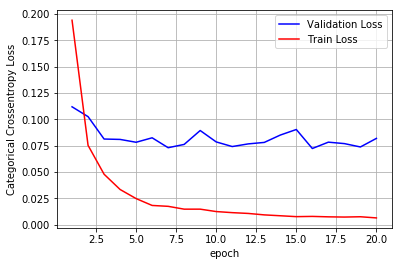

In [175]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

C:\Users\admin\AppData\Local\Programs\Python\Python36\Lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


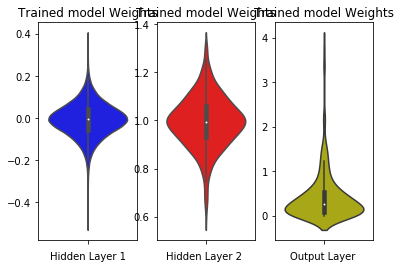

In [176]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# MLP+dropout+Adamoptimizer+batch normalization

In [177]:
# https://stackoverflow.cBatchNorkeras.layersyersyers/qiimport mport port ort tions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 10)                1290      
Total para

In [178]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

NameError: name 'nb_epoch' is not defined

In [ ]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# Hyper parameter tuning of keras model using sklearn

In [179]:
from keras.optimizers import Adam,RMSprop,SGD
def best_hyperparameters(activ):

    model = Sequential()
    model.add(Dense(512, activation=activ, input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
    model.add(Dense(128, activation=activ, kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
    model.add(Dense(output_dim, activation='softmax'))


    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return model

In [ ]:
# https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

activ = ['sigmoid','relu']

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(build_fn=best_hyperparameters, epochs=nb_epochs, batch_size=batch_size, verbose=0)
param_grid = dict(activ=activ)

# if you are using CPU
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
# if you are using GPU dont use the n_jobs parameter

grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, Y_train)

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))